# <h1>Group Question 2: Does an Academy Award require a certain budget?<h1>

This question explores the relationship between film production budgets and one of the highest-level artistic recognitions for a film, the Academy Award. Since Academy Awards nominations are known to help drive subsequent box-office sales (see [this link](https://knowledge.wharton.upenn.edu/article/oscars-economics/#:~:text=%E2%80%9CAccording%20to%20the%20data%2C%20it,the%20movie%2C%E2%80%9D%20he%20said.&text=%E2%80%9CThere's%20no%20evidence%20that%20%5BOscar,%2C%20your%20salary%20goes%20up.%E2%80%9D)), is there any way we can possibly quantify differences between award-nominated films and non-award nominated films? Can we see how much Microsoft would generally need to spend to create an award-winning film?

We hypothesize that _____________________.

Let's try to see if, based on our data, making an Academy Award-worthy film requires a certain budget range.

In [153]:
import pandas as pd
import os

In [154]:
pwd

'/Users/orin/Data Science/MODULE 1/Module-1-Project/Movie_Analysis'

In [155]:
from glob import glob

In [156]:
csv_files = glob("./zippedData/*.csv.gz")
csv_files

['./zippedData/imdb.title.crew.csv.gz',
 './zippedData/tmdb.movies.csv.gz',
 './zippedData/imdb.title.akas.csv.gz',
 './zippedData/imdb.title.ratings.csv.gz',
 './zippedData/imdb.name.basics.csv.gz',
 './zippedData/imdb.title.basics.csv.gz',
 './zippedData/tn.movie_budgets.csv.gz',
 './zippedData/bom.movie_gross.csv.gz',
 './zippedData/imdb.title.principals.csv.gz']

In [157]:
type(csv_files)
d = {}

In [158]:
for file in csv_files:
    d[file] = pd.read_csv(file)

In [159]:
d.keys()

dict_keys(['./zippedData/imdb.title.crew.csv.gz', './zippedData/tmdb.movies.csv.gz', './zippedData/imdb.title.akas.csv.gz', './zippedData/imdb.title.ratings.csv.gz', './zippedData/imdb.name.basics.csv.gz', './zippedData/imdb.title.basics.csv.gz', './zippedData/tn.movie_budgets.csv.gz', './zippedData/bom.movie_gross.csv.gz', './zippedData/imdb.title.principals.csv.gz'])

In [160]:
csv_files_dict = {}
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace(".csv", "").replace(".", "_").replace('_gz','') # cleaning the filenames
    filename_df = pd.read_csv(filename, index_col=0)
    csv_files_dict[filename_cleaned] = filename_df

In [161]:
csv_files_dict.keys()

dict_keys(['imdb_title_crew', 'tmdb_movies', 'imdb_title_akas', 'imdb_title_ratings', 'imdb_name_basics', 'imdb_title_basics', 'tn_movie_budgets', 'bom_movie_gross', 'imdb_title_principals'])

In [162]:
csv_files_dict['tn_movie_budgets']

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"


In [163]:
import sqlite3

In [164]:
conn = sqlite3.connect("movies_db.sqlite") 
cur = conn.cursor()

In [165]:
def create_sql_table_from_df(df, name, conn):     #batch-creating sql tables from multiple dataframes, with a for loop.
    try:
        df.to_sql(name, conn)
        print(f"Created table {name}")
    
    except Exception as e:
        print(f"could not make table {name}")
        print(e)

In [166]:
for name, table in csv_files_dict.items():
    create_sql_table_from_df(table, name, conn)

could not make table imdb_title_crew
Table 'imdb_title_crew' already exists.
could not make table tmdb_movies
Table 'tmdb_movies' already exists.
could not make table imdb_title_akas
Table 'imdb_title_akas' already exists.
could not make table imdb_title_ratings
Table 'imdb_title_ratings' already exists.
could not make table imdb_name_basics
Table 'imdb_name_basics' already exists.
could not make table imdb_title_basics
Table 'imdb_title_basics' already exists.
could not make table tn_movie_budgets
Table 'tn_movie_budgets' already exists.
could not make table bom_movie_gross
Table 'bom_movie_gross' already exists.
could not make table imdb_title_principals
Table 'imdb_title_principals' already exists.


In [167]:
cur.execute("select name from sqlite_master where type='table';").fetchall()

[('imdb_title_crew',),
 ('tmdb_movies',),
 ('imdb_title_akas',),
 ('imdb_title_ratings',),
 ('imdb_name_basics',),
 ('imdb_title_basics',),
 ('tn_movie_budgets',),
 ('bom_movie_gross',),
 ('imdb_title_principals',),
 ('films_by_awards.csv',),
 ('films_by_awards',),
 ('films_by_awards1',),
 ('films_by_awards2',),
 ('tn_movie_budgets2',),
 ('tn_movie_budgets_clean',)]

Creating a separate column in tn_movie_budgets for release year only. This will help us merge our scraped wikipedia table.

In [168]:
tn_movie_budgets_df = csv_files_dict['tn_movie_budgets']

In [169]:
tn_movie_budgets_df.shape

(5782, 5)

In [170]:
tn_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: object(5)
memory usage: 271.0+ KB


In [171]:
tn_movie_budgets_df.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [172]:
tn_movie_budgets_df['year'] =  pd.DatetimeIndex(tn_movie_budgets_df['release_date']).year

In [173]:
tn_movie_budgets_df 


,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
id,,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017
...,...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,2018
79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",1999
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",2005


In [174]:
def convert_amt_to_int(df, col):
    df[col] = df[col].str.replace("$", "").str.replace(",", "").astype('int')       #replacing unwanted characters
    return df

In [175]:
money_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in money_cols:
    tn_movie_budgets_df = convert_amt_to_int(tn_movie_budgets_df, col)

In [176]:
tn_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 6 columns):
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null int64
year                 5782 non-null int64
dtypes: int64(4), object(2)
memory usage: 316.2+ KB


Checking values to make sure they are clean

In [177]:
for col in tn_movie_budgets_df:
    print(f'Viewing values in col: {col}')
    print(f'Top 5 values:\n{tn_movie_budgets_df[col].value_counts(normalize = True)[:5]}')
    print("-------------------")

Viewing values in col: release_date
Top 5 values:
Dec 31, 2014    0.004151
Dec 31, 2015    0.003978
Dec 31, 2010    0.002594
Dec 31, 2008    0.002421
Dec 31, 2012    0.002248
Name: release_date, dtype: float64
-------------------
Viewing values in col: movie
Top 5 values:
Halloween              0.000519
King Kong              0.000519
Home                   0.000519
Cat People             0.000346
Clash of the Titans    0.000346
Name: movie, dtype: float64
-------------------
Viewing values in col: production_budget
Top 5 values:
20000000    0.039952
10000000    0.036666
30000000    0.030612
15000000    0.029920
25000000    0.029575
Name: production_budget, dtype: float64
-------------------
Viewing values in col: domestic_gross
Top 5 values:
0           0.094777
8000000     0.001557
2000000     0.001211
7000000     0.001211
10000000    0.001038
Name: domestic_gross, dtype: float64
-------------------
Viewing values in col: worldwide_gross
Top 5 values:
0          0.063473
8000000    0

Making a new columns for worldwide gross profit. Maybe we can test award winners against profit later!

In [178]:
tn_movie_budgets_df['budget_gross_profit'] = tn_movie_budgets_df['worldwide_gross'] - tn_movie_budgets_df['production_budget']
tn_movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,budget_gross_profit
id,,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009,2351345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,635063875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019,-200237650
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015,1072413963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,999721747


In [179]:
create_sql_table_from_df(tn_movie_budgets_df, 'tn_movie_budgets_clean', conn)

could not make table tn_movie_budgets_clean
Table 'tn_movie_budgets_clean' already exists.


Importing dataframe of our scraped Academy-Award winning films, and cleaning the column names

In [180]:
df2 = pd.read_csv('films_by_awards.csv')
df2.rename(columns = {"Film\n": "film", "Awards\n": "awards", "Nominations\n": "nominations", "Year\n": "year"}, inplace=True)
df2
create_sql_table_from_df(df2, 'films_by_awards2', conn)

could not make table films_by_awards2
Table 'films_by_awards2' already exists.


/Users/orin/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:2712: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [231]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316 entries, 0 to 1315
Data columns (total 5 columns):
Unnamed: 0     1316 non-null int64
film           1316 non-null object
year           1316 non-null object
awards         1316 non-null object
nominations    1316 non-null object
dtypes: int64(1), object(4)
memory usage: 51.5+ KB


Joining academy awards winner data to table of gross and profit data

In [181]:
cur.execute('''SELECT b.*, awards, nominations
                FROM tn_movie_budgets_clean b
                LEFT JOIN films_by_awards2 a
                ON a.film = b.movie
                AND a.year = b.year                                
                ORDER BY budget_gross_profit DESC                  
                ''')                            # we needed to join our scraped table on two conditions, because some 
                                                #films were created on multiple years with the same name.            
awards_to_budget_df = pd.DataFrame(cur.fetchall())
awards_to_budget_df.columns = [x[0] for x in cur.description]
awards_to_budget_df[:50]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,budget_gross_profit,awards,nominations
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009,2351345279,3,9
1,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,1997,2008208395,11,14
2,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2018,1748134200,None,None
3,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,1747311220,None,None
4,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,2015,1433854864,None,None
5,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,2015,1328722794,None,None
6,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,2012,1292935897,None,None
7,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,2011,1216693157,None,None
8,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,2018,1148258224,3,7
9,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,2018,1135772799,None,None


In [182]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# New Data Cleaning

In [183]:
awards_to_budget_df['awards'].unique()

array(['3', '11', None, '2', '1', '4', '6', '7', '5', '8 (2)', '8',
       '4 (1)', '0 (1)', '1 (1)', '9', '0 (2)', '10', '5 (1)', '7 (1)'],
      dtype=object)

In [184]:
awards_to_budget_df['nominations'].unique()

array(['9', '14', None, '7', '2', '11', '3', '5', '4', '1', '6', '8',
       '13', '10', '12', '10[4]\n', '0', '6[11]\n'], dtype=object)

cleaning awards data

In [185]:
def clean_vals(df, col):
    df[col] = df[col].str.rstrip('\n').str.replace("\(.*\)", "").fillna("0").astype('int')
    return df

In [186]:
academy_award_cols = ['awards']

for col in academy_award_cols:
    awards_to_budget_df = clean_vals(awards_to_budget_df, col)

In [187]:
awards_to_budget_df['awards'].unique()

array([ 3, 11,  0,  2,  1,  4,  6,  7,  5,  8,  9, 10])

In [188]:
awards_to_budget_df['nominations'].unique()

array(['9', '14', None, '7', '2', '11', '3', '5', '4', '1', '6', '8',
       '13', '10', '12', '10[4]\n', '0', '6[11]\n'], dtype=object)

Cleaning the nominations list

In [189]:
'10[4]\n'.split('[')

['10', '4]\n']

In [190]:
value_split = awards_to_budget_df['nominations'].str.split('[').fillna("0")

In [191]:
type(value_split)

pandas.core.series.Series

In [192]:
(value_split[0][0])

'9'

Reassigning the cleaned value back to the 'nominations' column

In [193]:
awards_to_budget_df['nominations'] = value_split.str.get(0).astype('int')

In [194]:
awards_to_budget_df['nominations'].unique()

array([ 9, 14,  0,  7,  2, 11,  3,  5,  4,  1,  6,  8, 13, 10, 12])

Remove movies which have not been released yet, or made absolutely no money whatsoever.

In [195]:
current_movies = awards_to_budget_df[awards_to_budget_df['worldwide_gross'] == 0]
current_movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,budget_gross_profit,awards,nominations
3658,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,2015,-1400,0,0
3663,78,"Dec 31, 2018",Red 11,7000,0,0,2018,-7000,0,0
3667,72,"May 19, 2015",Family Motocross,10000,0,0,2015,-10000,0,0
3669,65,"Dec 31, 2007",Tin Can Man,12000,0,0,2007,-12000,0,0
3673,62,"Dec 31, 2014",Stories of Our Lives,15000,0,0,2014,-15000,0,0
...,...,...,...,...,...,...,...,...,...,...
5770,72,"Dec 31, 2019",355,75000000,0,0,2019,-75000000,0,0
5773,36,"Feb 21, 2020",Call of the Wild,82000000,0,0,2020,-82000000,0,0
5774,80,"Dec 13, 2017",Bright,90000000,0,0,2017,-90000000,0,0
5775,81,"Dec 31, 2019",Army of the Dead,90000000,0,0,2019,-90000000,0,0


In [196]:
gross_index = awards_to_budget_df[awards_to_budget_df['worldwide_gross'] == 0].index
awards_to_budget_df.drop(gross_index, inplace=True)

In [197]:
awards_to_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5415 entries, 0 to 5781
Data columns (total 10 columns):
id                     5415 non-null int64
release_date           5415 non-null object
movie                  5415 non-null object
production_budget      5415 non-null int64
domestic_gross         5415 non-null int64
worldwide_gross        5415 non-null int64
year                   5415 non-null int64
budget_gross_profit    5415 non-null int64
awards                 5415 non-null int64
nominations            5415 non-null int64
dtypes: int64(8), object(2)
memory usage: 465.4+ KB


Create column for boolean value of nomination (nominated or not)

In [198]:
awards_to_budget_df['nominated'] = (awards_to_budget_df['nominations'] > 0)
awards_to_budget_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,budget_gross_profit,awards,nominations,nominated
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009,2351345279,3,9,True
1,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,1997,2008208395,11,14,True
2,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2018,1748134200,0,0,False
3,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,1747311220,0,0,False
4,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,2015,1433854864,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...
5776,5,"Aug 16, 2002",The Adventures of Pluto Nash,100000000,4411102,7094995,2002,-92905005,0,0,False
5777,53,"Apr 27, 2001",Town & Country,105000000,6712451,10364769,2001,-94635231,0,0,False
5778,42,"Jun 14, 2019",Men in Black: International,110000000,3100000,3100000,2019,-106900000,0,0,False
5779,94,"Mar 11, 2011",Mars Needs Moms,150000000,21392758,39549758,2011,-110450242,0,0,False


creating simple frame with only our desired data

In [199]:
awards_to_budget_df.describe()

,id,production_budget,domestic_gross,worldwide_gross,year,budget_gross_profit,awards,nominations
count,5415.000000,5.415000e+03,5.415000e+03,5.415000e+03,5415.000000,5.415000e+03,5415.000000,5415.000000
mean,50.227701,3.330801e+07,4.471128e+07,9.768800e+07,2003.599446,6.437999e+07,0.155309,0.373961
std,28.765167,4.248758e+07,6.960989e+07,1.788591e+08,12.546965,1.498581e+08,0.782424,1.645971
min,1.000000,1.100000e+03,0.000000e+00,2.600000e+01,1915.000000,-2.002376e+08,0.000000,0.000000
25%,25.000000,6.000000e+06,3.160708e+06,7.004834e+06,1999.000000,-1.862082e+06,0.000000,0.000000
50%,50.000000,1.900000e+07,2.030022e+07,3.333987e+07,2006.000000,1.190000e+07,0.000000,0.000000
75%,75.000000,4.200000e+07,5.578249e+07,1.044590e+08,2012.000000,6.737924e+07,0.000000,0.000000
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,2019.000000,2.351345e+09,11.000000,14.000000


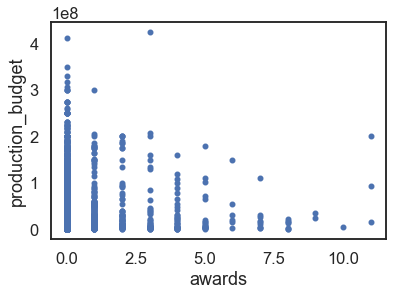

In [200]:
ax = awards_to_budget_df.plot.scatter(x='awards', y='production_budget')

In [201]:
import seaborn as sns

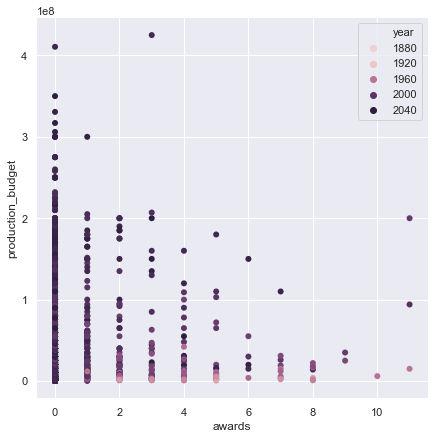

In [202]:
sns.set(style="darkgrid")


# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(7, 7))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="awards", y="production_budget",
                hue="year",
                hue_order='year',
                sizes=(1, 8), linewidth=0,
                data=awards_to_budget_df, ax=ax)



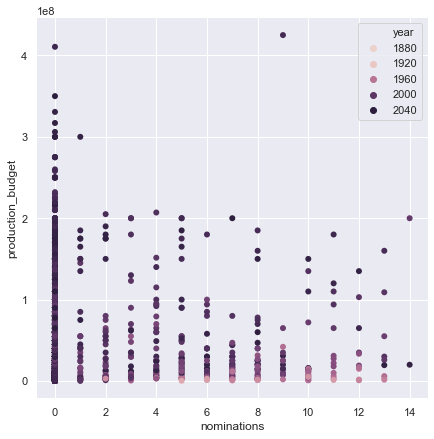

In [203]:
sns.set(style="darkgrid")


# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(7, 7))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="nominations", y="production_budget",
                hue="year",
                hue_order='year',
                sizes=(1, 8), linewidth=0,
                data=awards_to_budget_df, ax=ax)



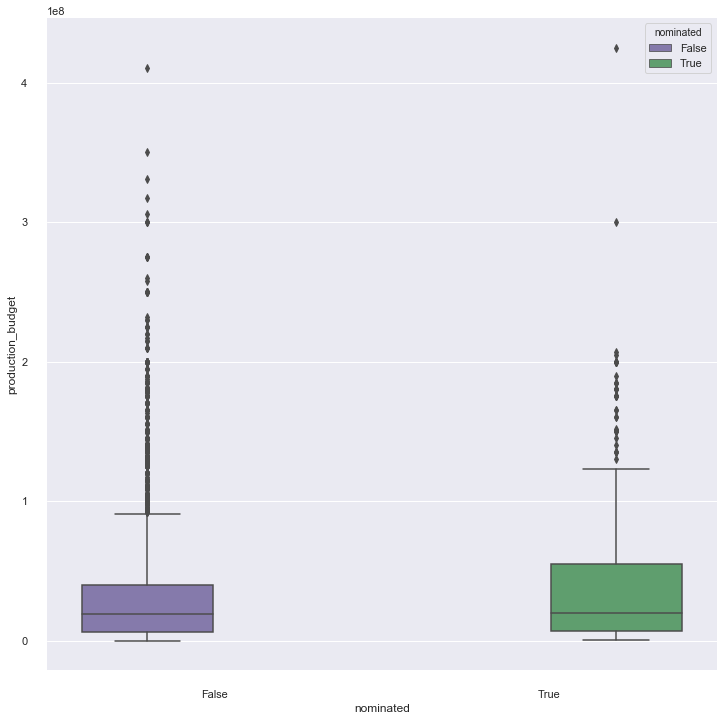

In [204]:
f, ax = plt.subplots(figsize=(12, 12))

sns.boxplot(x="nominated", y="production_budget",
            hue="nominated", palette=["m", "g"],
            data=awards_to_budget_df)

sns.despine(offset=10, trim=True)

The our data is getting crunched by some far-reaching outliers. Let's remove the most extreme and see if we can get a better idea of the distribution of each category.

In [205]:
budget = awards_to_budget_df['production_budget']
removed_outliers = budget.between(budget.quantile(.01), budget.quantile(.99))
index_names = awards_to_budget_df[~removed_outliers].index         # "~" is inverting the dataframe
print(index_names)

Int64Index([   0,    2,    3,    4,    6,   13,   17,   19,   28,   29,   37,
              45,   54,   61,   63,   65,   73,   81,   82,   85,   89,  101,
             108,  123,  167,  170,  210,  232,  236,  246,  264,  396,  530,
             633,  729,  883,  916, 1072, 1708, 2277, 2783, 2942, 3161, 3221,
            3292, 3310, 3360, 3383, 3456, 3501, 3518, 3535, 3547, 3559, 3563,
            3565, 3574, 3576, 3589, 3590, 3596, 3601, 3602, 3606, 3609, 3613,
            3616, 3619, 3623, 3630, 3633, 3638, 3660, 3661, 3662, 3664, 3665,
            3666, 3668, 3671, 3675, 3681, 3683, 3689, 3692, 3697, 3700, 3711,
            3717, 3718, 3719, 5341, 5781],
           dtype='int64')


In [206]:
awards_to_budget_df.drop(index_names, inplace=True)

In [233]:
awards_to_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5322 entries, 1 to 5779
Data columns (total 11 columns):
id                     5322 non-null int64
release_date           5322 non-null object
movie                  5322 non-null object
production_budget      5322 non-null int64
domestic_gross         5322 non-null int64
worldwide_gross        5322 non-null int64
year                   5322 non-null int64
budget_gross_profit    5322 non-null int64
awards                 5322 non-null int64
nominations            5322 non-null int64
nominated              5322 non-null bool
dtypes: bool(1), int64(8), object(2)
memory usage: 622.6+ KB


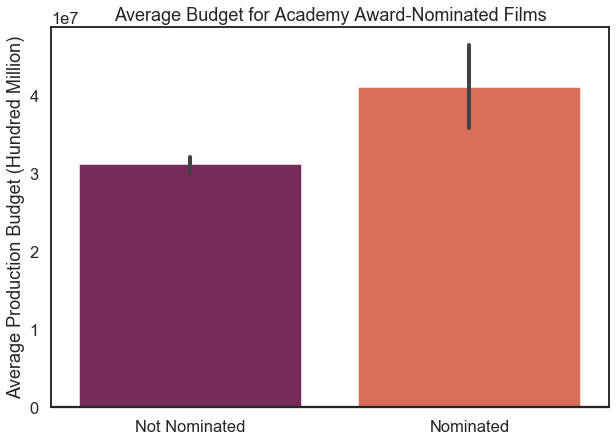

In [230]:
sns.set(style="white", context="talk")


# Set up the matplotlib figure
f, (ax1) = plt.subplots(figsize=(10, 7), sharex=True)

# Generate some sequential data
x = awards_to_budget_df['nominated']
y1 = awards_to_budget_df['production_budget']
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Average Production Budget (Hundred Million)")
ax1.set_xlabel('')
ax1.set(xticklabels=["Not Nominated", "Nominated"])
ax1.set_title("Average Budget for Academy Award-Nominated Films");



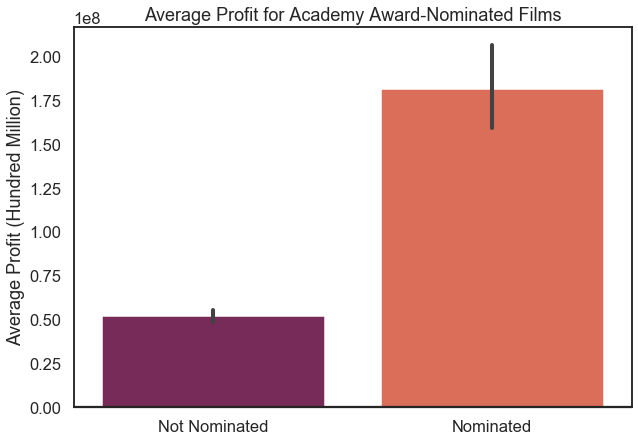

In [234]:
sns.set(style="white", context="talk")


# Set up the matplotlib figure
f, (ax1) = plt.subplots(figsize=(10, 7), sharex=True)

# Generate some sequential data
x = awards_to_budget_df['nominated']
y1 = awards_to_budget_df['budget_gross_profit']
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Average Profit (Hundred Million)")
ax1.set_xlabel('')
ax1.set(xticklabels=["Not Nominated", "Nominated"])
ax1.set_title("Average Profit for Academy Award-Nominated Films");

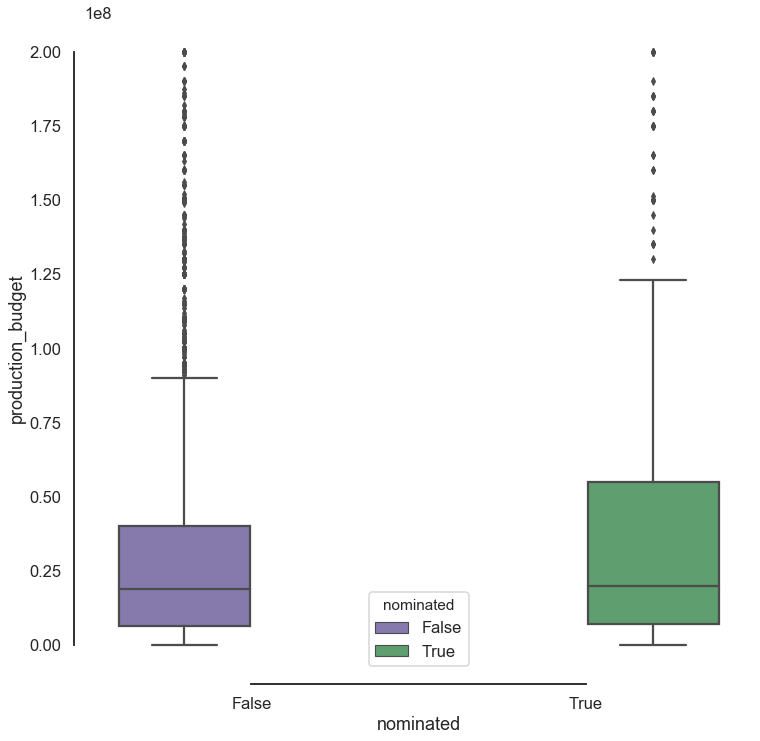

In [209]:
f, ax = plt.subplots(figsize=(12, 12))

sns.boxplot(x="nominated", y="production_budget",
            hue="nominated", palette=["m", "g"],
            data=awards_to_budget_df)

sns.despine(offset=10, trim=True)

Our last boxplot here shows that, production_budgets had a relatively greater distribution for movies which ended up recieving nominations. A logical explanation to this is that it costs more money to hire better acting talent, writers, directors, the rest of the professional film crew, etc, which should result in a better chance at an Academy Award.
